In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

## 4.6.1 Stock market data set

In [4]:
smarket = pd.read_csv('../data/Smarket.csv', index_col=0)
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [5]:
smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


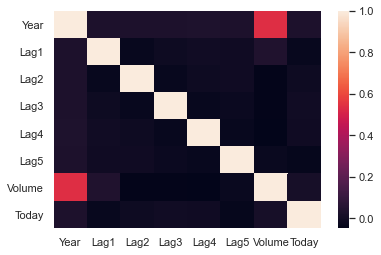

In [6]:
sns.heatmap(smarket.corr());

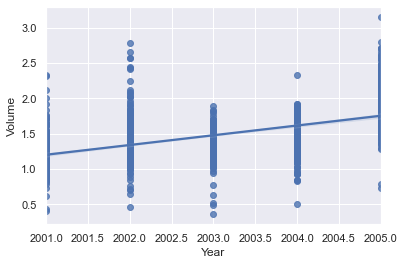

In [11]:
sns.regplot(x='Year', y='Volume', data=smarket);

## 4.6.2 Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

smarket['Direction2'] = smarket.Direction.map({'Down': 0, 'Up': 1})
formula = 'Direction2 ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'
clf = smf.logit(formula, smarket).fit()
print(clf.summary())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             Direction2   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Mon, 21 Dec 2020   Pseudo R-squ.:                0.002074
Time:                        21:00:20   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

In [24]:
clf.pred_table()

array([[145., 457.],
       [141., 507.]])

In [31]:
mask = (smarket.Year < 2005)
train = smarket[mask]
test = smarket[~mask]
clf = smf.logit(formula, train).fit()
probs = clf.predict(test)
pred = (probs > .5)
confusion_matrix(test.Direction2, pred)

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


array([[77, 34],
       [97, 44]], dtype=int64)

In [38]:
formula2 = 'Direction2 ~ Lag1 + Lag2'
clf = smf.logit(formula2, train).fit()
probs = clf.predict(test)
pred = (probs > .5)
print(confusion_matrix(test.Direction2, pred))
print('Test error rate: ', np.mean(test.Direction2 != pred))

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3
[[ 35  76]
 [ 35 106]]
Test error rate:  0.44047619047619047


## 4.6.3 Linear Discriminant Analysis

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

X_train = train[['Lag1', 'Lag2']]
y_train = train.Direction
clf = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [44]:
clf.priors_

array([0.49198397, 0.50801603])

In [46]:
clf.classes_

array(['Down', 'Up'], dtype='<U4')

In [45]:
clf.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [50]:
X_test = test[['Lag1', 'Lag2']]
y_test = test.Direction
pred = clf.predict(X_test)
confusion_matrix(y_test, pred)

array([[ 35,  76],
       [ 35, 106]], dtype=int64)

## 4.6.4 Quadratic Discriminant Analysis

In [52]:
clf = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
probs = clf.predict_proba(X_test)
preds = clf.predict(X_test)

In [53]:
confusion_matrix(y_test, preds)

array([[ 30,  81],
       [ 20, 121]], dtype=int64)

## 4.6.5 KNN Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
preds = knn_clf.predict(X_test)
confusion_matrix(y_test, preds)

array([[48, 63],
       [55, 86]], dtype=int64)